In [26]:
import pandas as pd

archs = [
    "single-layer-10-relu",
    "single-layer-5-relu",
    "single-layer-3-relu",
    "single-layer-1-relu",
    "dual-layer-30-10-relu",
    "dual-layer-20-10-relu",
    "dual-layer-30-5-relu",
    "dual-layer-20-5-relu",
    "dual-layer-30-3-relu",
    "dual-layer-20-3-relu",
    "triple-layer-40-20-10-relu",
    "triple-layer-30-20-10-relu",
    "triple-layer-30-20-5-relu",
    "triple-layer-40-20-5-relu",
    "triple-layer-40-15-5-relu",
    "triple-layer-30-15-3-relu",
    "quadruple-layer-40-20-10-5-relu",
    "quadruple-layer-40-15-8-3-relu",
    "quadruple-layer-40-15-8-1-relu"
]

partial_results = []
for i in range(0, 10):
    for a in archs:
        partial_results.append(
            (i+1, a, f"../workdir-autoencoders-20250203-{i + 1}-{a}-denoising/final_defects_stats.csv", "denoising")
        )
        partial_results.append(
            (i+1, a, f"../workdir-autoencoders-20250203-{i + 1}-{a}-featureselection/final_defects_stats.csv", "featureselection")
        )

def readall(p):
    csv = pd.read_csv(filepath_or_buffer=p[2], sep=',')
    csv['iteration'] = p[0]
    csv['autoencoder_arch'] = p[1]
    csv['autoencoder_mode'] = p[3]
    return csv

results = pd.concat([readall(p) for p in partial_results])
description = results.groupby(["model_type", "autoencoder_arch", "autoencoder_mode"]).describe()

description = results.filter(["model_type", "autoencoder_arch", "autoencoder_mode", "real_mcc", "real_precision"]).groupby(["model_type", "autoencoder_arch", "autoencoder_mode"]).describe()
description

real_mcc  \
                                                                     count   
model_type            autoencoder_arch           autoencoder_mode            
scaled-linear-ridge   dual-layer-20-10-relu      denoising            50.0   
                                                 featureselection     50.0   
                      dual-layer-20-3-relu       denoising            50.0   
                                                 featureselection     50.0   
                      dual-layer-20-5-relu       denoising            50.0   
...                                                                    ...   
unscaled-randomforest triple-layer-40-15-5-relu  featureselection     50.0   
                      triple-layer-40-20-10-relu denoising            50.0   
                                                 featureselection     50.0   
                      triple-layer-40-20-5-relu  denoising            50.0   
                                                 featureselection     50.0   

                                                                             \
                                                                       mean   
model_type            autoencoder_arch           autoencoder_mode             
scaled-linear-ridge   dual-layer-20-10-relu      denoising         0.354991   
                                                 featureselection  0.339001   
                      dual-layer-20-3-relu       denoising         0.247841   
                                                 featureselection  0.181427   
                      dual-layer-20-5-relu       denoising         0.295701   
...                                                                     ...   
unscaled-randomforest triple-layer-40-15-5-relu  featureselection  0.387403   
                      triple-layer-40-20-10-relu denoising         0.456783   
                                                 featureselection  0.447927   
                      triple-layer-40-20-5-relu  denoising         0.410836   
                                                 featureselection  0.399967   

                                                                             \
                                                                        std   
model_type            autoencoder_arch           autoencoder_mode             
scaled-linear-ridge   dual-layer-20-10-relu      denoising         0.022045   
                                                 featureselection  0.027496   
                      dual-layer-20-3-relu       denoising         0.034276   
                                                 featureselection  0.037657   
                      dual-layer-20-5-relu       denoising         0.039685   
...                                                                     ...   
unscaled-randomforest triple-layer-40-15-5-relu  featureselection  0.035838   
                      triple-layer-40-20-10-relu denoising         0.011532   
                                                 featureselection  0.006652   
                      triple-layer-40-20-5-relu  denoising         0.018429   
                                                 featureselection  0.016589   

                                                                             \
                                                                        min   
model_type            autoencoder_arch           autoencoder_mode             
scaled-linear-ridge   dual-layer-20-10-relu      denoising         0.297442   
                                                 featureselection  0.288267   
                      dual-layer-20-3-relu       denoising         0.195200   
                                                 featureselection  0.125864   
                      dual-layer-20-5-relu       denoising         0.240155   
...                                                                     ...   
unscaled-randomforest triple-layer-40-15-5-relu 

In [27]:
series = description.filter([("real_mcc", "50%")]).reset_index()
series["mcc"] = series[("real_mcc", "50%")]
series


,model_type,autoencoder_arch,autoencoder_mode,real_mcc,mcc
,,,,50%,
0,scaled-linear-ridge,dual-layer-20-10-relu,denoising,0.354546,0.354546
1,scaled-linear-ridge,dual-layer-20-10-relu,featureselection,0.342888,0.342888
2,scaled-linear-ridge,dual-layer-20-3-relu,denoising,0.244317,0.244317
3,scaled-linear-ridge,dual-layer-20-3-relu,featureselection,0.179253,0.179253
4,scaled-linear-ridge,dual-layer-20-5-relu,denoising,0.287539,0.287539
...,...,...,...,...,...
109,unscaled-randomforest,triple-layer-40-15-5-relu,featureselection,0.399019,0.399019
110,unscaled-randomforest,triple-layer-40-20-10-relu,denoising,0.456491,0.456491
111,unscaled-randomforest,triple-layer-40-20-10-relu,featureselection,0.448094,0.448094


<Axes: xlabel='Autoencoder architecture', ylabel='MCC'>

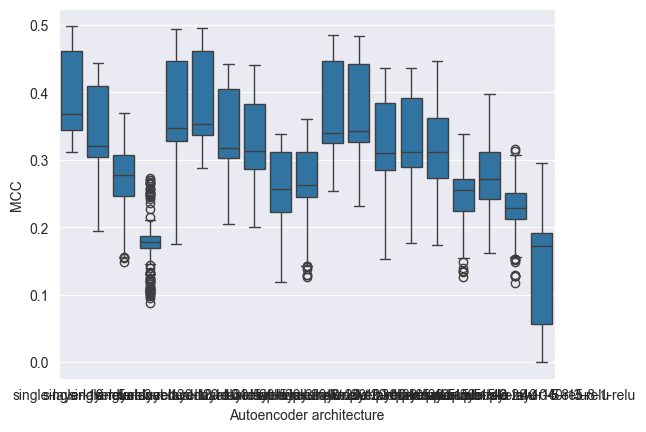

In [28]:
import seaborn as sns

smellchart_data = results.filter(["real_mcc", "autoencoder_arch"])
smellchart_data["MCC"] = smellchart_data["real_mcc"]
smellchart_data["Autoencoder architecture"] = smellchart_data["autoencoder_arch"]

sns.boxplot(
    smellchart_data, y="MCC", x="Autoencoder architecture"
)

<Axes: xlabel='Autoencoder architecture', ylabel='Precision'>

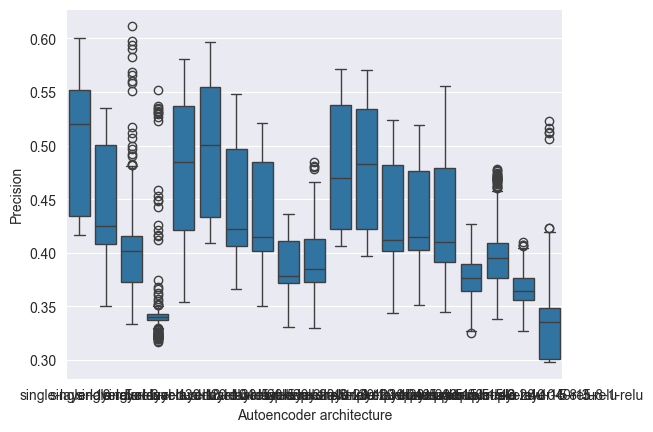

In [29]:
prec_smellchart_data = results.filter(["real_precision", "autoencoder_arch"])
prec_smellchart_data["Precision"] = prec_smellchart_data["real_precision"]
prec_smellchart_data["Autoencoder architecture"] = prec_smellchart_data["autoencoder_arch"]

sns.boxplot(
    prec_smellchart_data, y="Precision", x="Autoencoder architecture"
)


<Axes: xlabel='ML model', ylabel='MCC'>

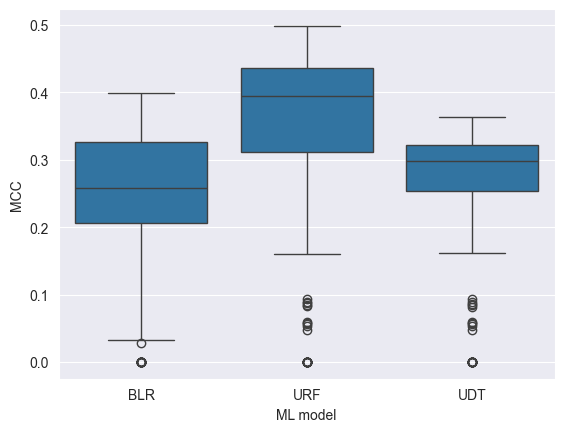

In [39]:
MODEL_NAME_MAPPING = {
    "scaled-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB"
}

modeltype_data = results.filter(["real_mcc", "model_type"])
modeltype_data["MCC"] = modeltype_data["real_mcc"]
modeltype_data["ML model"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

sns.boxplot(
    modeltype_data, y="MCC", x="ML model"
)

<Axes: xlabel='ML model', ylabel='Precision'>

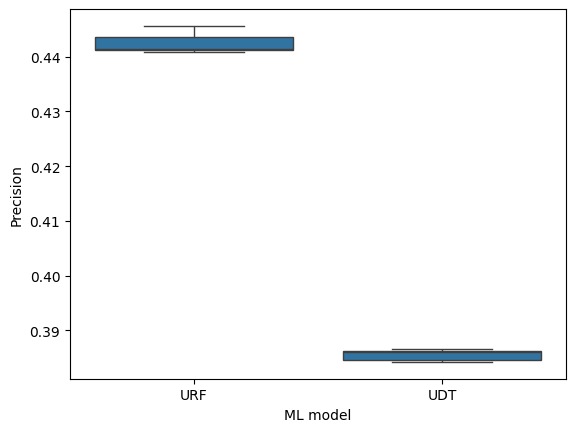

In [7]:
prec_modeltype_data = results.filter(["real_precision", "model_type"])
prec_modeltype_data["Precision"] = prec_modeltype_data["real_precision"]
prec_modeltype_data["ML model"] = prec_modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

sns.boxplot(
    prec_modeltype_data, y="Precision", x="ML model"
)

[Text(0.5, 0, 'Metric set'), Text(0, 0.5, 'MCC'), []]

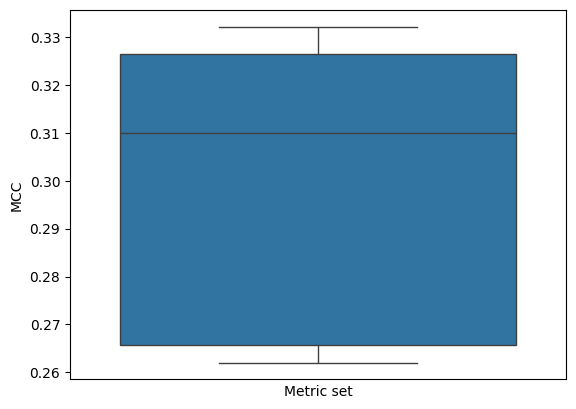

In [8]:
metrictype_data = results.filter(["real_mcc", "metric_set"])

sns.boxplot(
    metrictype_data, y="real_mcc", x="metric_set"
).set(xlabel = "Metric set", ylabel = "MCC", xticks = [])

[Text(0.5, 0, 'Metric set'), Text(0, 0.5, 'Precision'), []]

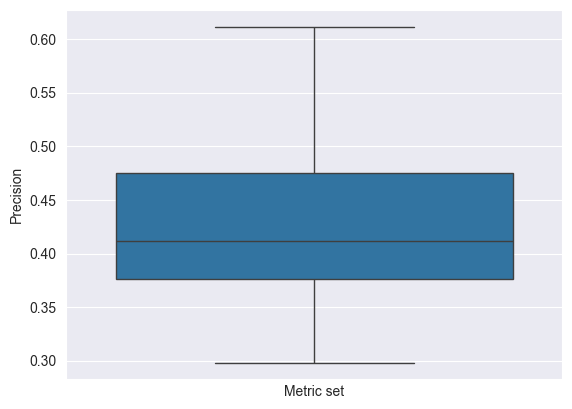

In [25]:
metrictype_data = results.filter(["real_precision", "metric_set"])

sns.boxplot(
    metrictype_data, y="real_precision", x="metric_set"
).set(xlabel="Metric set", ylabel="Precision", xticks=[])


In [10]:
metric_describable_data = results.filter(["real_precision", "real_mcc", "metric_set", "smell_models"])
metric_describable_data["mcc"] = metric_describable_data["real_mcc"]
metric_describable_data["precision"] = metric_describable_data["real_precision"]
metric_describable_data = metric_describable_data.filter(["precision", "mcc", "metric_set", "smell_models"])


grouped_data = metric_describable_data.groupby(["metric_set", "smell_models"]).describe()
grouped_data.style.to_latex(buf = "metrics-singlemetric.tex")
grouped_data

precision                                \
                                      count      mean       std       min   
metric_set           smell_models                                           
all-non-null-numeric False             15.0  0.435348  0.039609  0.384209   

                                                                           \
                                        25%       50%       75%       max   
metric_set           smell_models                                           
all-non-null-numeric False         0.386448  0.441394  0.471798  0.484792   

                                    mcc                                \
                                  count      mean       std       min   
metric_set           smell_models                                       
all-non-null-numeric False         15.0  0.301293  0.028681  0.262015   

                                                                           
                                        25%       50%       75%       max  
metric_set           smell_models                                          
all-non-null-numeric False         0.265795  0.309987  0.326444  0.332223